# Sprawozdanie 4 - Algorytm Schrage


Sprawdzenie poprawności działania algorytmu Schrage

In [1]:
from rpq import *
schdl1 = Schedule("./dane rpq/in50.txt")
schdl2 = Schedule("./dane rpq/in100.txt")
schdl3 = Schedule("./dane rpq/in200.txt")


def schrage(schdl):
    sig = []
    nn = schdl.__copy__()
    ng = Schedule(job_list=[])
    t = min(nn.job_list, key=lambda x: x.r).r
    # print(t)

    while ng.job_list != [] or nn.job_list != []:
        while nn.job_list != [] and min(nn.job_list, key=lambda x: x.r).r <= t:

            j = min(nn.job_list, key=lambda x: x.r)
            ng.job_list.append(j)
            nn.job_list.remove(j)

        if not ng.job_list:
            t = min(nn.job_list, key=lambda x: x.r).r
        else:
            j = max(ng.job_list, key=lambda x: x.q)

            ng.job_list.remove(j)
            sig.append(j)
            t += j.p
    return Schedule(job_list=sig)


schdl1 = schrage(schdl1)
print("Otrzymano wynik: "+str(schdl1.cmax()))
print("Prawidłowy wynik dla instancji in50 to: 1513")
    
schdl2 = schrage(schdl2)
print("Otrzymano wynik: "+str(schdl2.cmax()))
print("Prawidłowy wynik dla instancji in100 to: 3076")

schdl3 = schrage(schdl3)
print("Otrzymano wynik: "+str(schdl3.cmax()))
print("Prawidłowy wynik dla instancji in200: 6416")

Otrzymano wynik: 1513
Prawidłowy wynik dla instancji in50 to: 1513
Otrzymano wynik: 3076
Prawidłowy wynik dla instancji in100 to: 3076
Otrzymano wynik: 6416
Prawidłowy wynik dla instancji in200: 6416


# Sprawdzenie poprawności działania algorytmu Schrage z przerwaniami

In [2]:
from rpq import *
schdl1 = Schedule("./dane rpq/in50.txt")
schdl2 = Schedule("./dane rpq/in100.txt")
schdl3 = Schedule("./dane rpq/in200.txt")


def schrage_pmtn(schdl):
    Cmax = 0
    nn = schdl.__copy__()
    ng = Schedule(job_list=[])
    t = 0
    l = 0
    q0 = 1e300*1e300

    while ng.job_list != [] or nn.job_list != []:
        while nn.job_list != [] and min(nn.job_list, key=lambda x: x.r).r <= t:

            j = min(nn.job_list, key=lambda x: x.r)
            ng.job_list.append(j)
            nn.job_list.remove(j)

            if l != 0:
                if j.q > l.q:
                    l.p = t - j.r
                    t = j.r

                    if l.p > 0:
                        ng.job_list.append(l)

        if not ng.job_list:
            t = min(nn.job_list, key=lambda x: x.r).r
        else:
            j = max(ng.job_list, key=lambda x: x.q)

            ng.job_list.remove(j)
            l = j
            t += j.p
            Cmax = max(Cmax, t+j.q)
    return Cmax


schdl1 = schrage_pmtn(schdl1)
print("Otrzymano wynik: "+str(schdl1))
print("Prawidłowy wynik dla instancji in50 to: 1492")
    
schdl2 = schrage_pmtn(schdl2)
print("Otrzymano wynik: "+str(schdl2))
print("Prawidłowy wynik dla instancji in100 to: 3070")

schdl3 = schrage_pmtn(schdl3)
print("Otrzymano wynik: "+str(schdl3))
print("Prawidłowy wynik dla instancji in200: 6398")

Otrzymano wynik: 1492
Prawidłowy wynik dla instancji in50 to: 1492
Otrzymano wynik: 3070
Prawidłowy wynik dla instancji in100 to: 3070
Otrzymano wynik: 6398
Prawidłowy wynik dla instancji in200: 6398


# Sprawdzenie czasu obliczeń


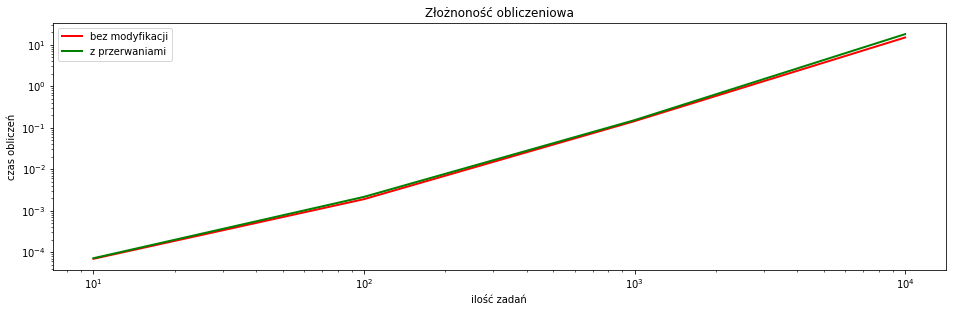

In [7]:
from random import seed, randint
import matplotlib.pyplot as plt
import pylab
import time
from rpq import *

%matplotlib inline
seed(370773)

schdl = Schedule()
basic_time = []
opt1_time = []
opt1_int_time = []
opt2_time = []
opt2_int_time = []

# rozmiar wykresów
plot_width, plot_height = 16, 10

plt.rcParams['figure.figsize'] = [plot_width, plot_height]
tabular1, instances = "instancja", []

# tutaj zmienia się zakres
n = [10**i for i in range(1, 5)]

for i in n:
    schdl = Schedule(randomize=True, length=i)
    
    start = time.time()
    schdl = schrage(schdl)
    end = time.time()
    basic_time.append(end-start)

    start = time.time()
    schdl = schrage(schdl)
    end = time.time()
    opt1_time.append(end-start)
    
    start = time.time()
    schdl = schrage_pmtn(schdl)
    end = time.time()
    opt1_int_time.append(end-start)

    
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(n, basic_time, color='red', lw=2, label="bez modyfikacji")
#line, = ax.plot(n, opt1_time, color='blue', lw=2, label="pierwsza optymalizaja")
line, = ax.plot(n, opt1_int_time, color='green', lw=2, label="z przerwaniami")
#line, = ax.plot(n, opt2_time, color='black', lw=2, label="druga optymalizaja")
#line, = ax.plot(n, opt2_int_time, color='cyan', lw=2, label="druga optymalizacja z przerwaniami")

ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Złożnoność obliczeniowa")
plt.xlabel("ilość zadań")
plt.ylabel("czas obliczeń")
plt.legend()
pylab.show()
